# Data Prep

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [89]:
plt.style.use("dark_background")



In [47]:
ls

ADSK.csv                              Project_VAR.ipynb
AMZN.csv                              Time Series Presentation Script.docx
DFF.csv                               Week 4 Milestone.pdf
FB.csv                                Week 7 Milestone.pdf
GOOG.csv                              event_dates.csv
MSFT.csv                              fb_project_prophet.ipynb
NVDA.csv                              ~$me Series Presentation Script.docx
Project_Smoothing.ipynb


In [48]:
FB = pd.read_csv('FB.csv')
# High correlation groups
ADSK = pd.read_csv('ADSK.csv')
AMZN = pd.read_csv('AMZN.csv')
GOOG = pd.read_csv('GOOG.csv')

# Short DTW distance groups
# MSFT, ADSK, NVDA
MSFT = pd.read_csv('MSFT.csv')
NVDA = pd.read_csv('NVDA.csv')



In [50]:
FB = FB[['Date','Close']]
FB.rename(columns={'Close':'FB'}, inplace=True) 

ADSK = ADSK[['Close']]
ADSK.rename(columns={'Close':'ADSK'}, inplace=True) 

AMZN = AMZN[['Close']]
AMZN.rename(columns={'Close':'AMZN'}, inplace=True) 

GOOG = GOOG[['Close']]
GOOG.rename(columns={'Close':'GOOG'}, inplace=True) 

NVDA = NVDA[['Close']]
NVDA.rename(columns={'Close':'NVDA'}, inplace=True) 

MSFT = MSFT[['Close']]
MSFT.rename(columns={'Close':'MSFT'}, inplace=True) 


In [51]:
data = pd.concat([FB,ADSK, AMZN, GOOG, MSFT, NVDA], axis=1) 
data.head(5)

,Date,FB,ADSK,AMZN,GOOG,MSFT,NVDA
0,2017-04-24,145.470001,90.139999,907.409973,862.760010,67.529999,25.737499
1,2017-04-25,146.490005,90.320000,907.619995,872.299988,67.919998,26.184999
2,2017-04-26,146.559998,90.230003,909.289978,871.729980,67.830002,26.004999
3,2017-04-27,147.699997,90.629997,918.380005,874.250000,68.269997,26.410000
4,2017-04-28,150.250000,90.070000,924.989990,905.960022,68.459999,26.075001


In [52]:
# Make date index
data = data.set_index(pd.DatetimeIndex(data['Date']))
data.drop('Date', axis = 1, inplace = True)


In [53]:
data.head(5)

,FB,ADSK,AMZN,GOOG,MSFT,NVDA
Date,,,,,,
2017-04-24,145.470001,90.139999,907.409973,862.760010,67.529999,25.737499
2017-04-25,146.490005,90.320000,907.619995,872.299988,67.919998,26.184999
2017-04-26,146.559998,90.230003,909.289978,871.729980,67.830002,26.004999
2017-04-27,147.699997,90.629997,918.380005,874.250000,68.269997,26.410000
2017-04-28,150.250000,90.070000,924.989990,905.960022,68.459999,26.075001


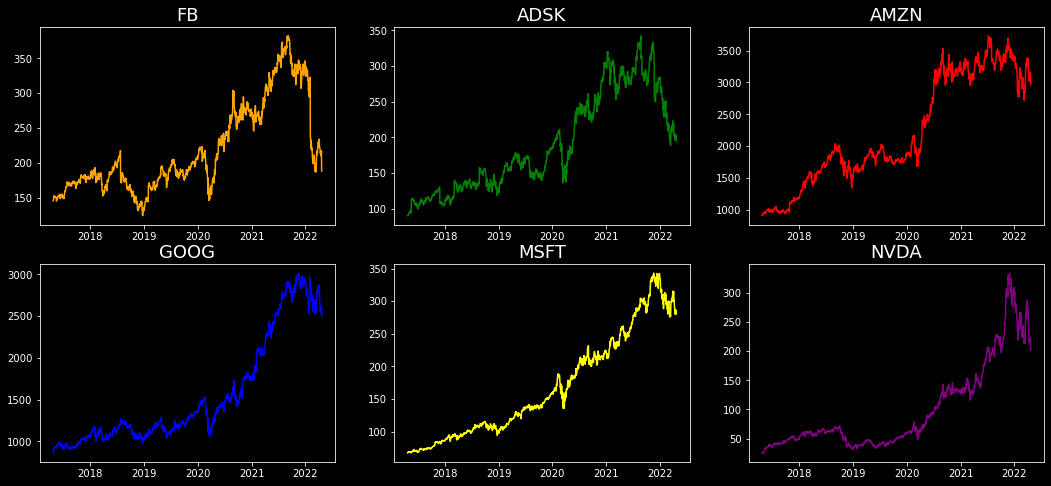

In [61]:
fig, ax = plt.subplots(nrows = 2, ncols= 3, figsize = (18,8))

ax[0, 0].plot(data['FB'], color = 'orange')
ax[0, 0].set_title('FB', fontsize = 18)
ax[0, 1].plot(data['ADSK'], color = 'green')
ax[0, 1].set_title('ADSK', fontsize = 18)
ax[0, 2].plot(data['AMZN'], color = 'red')
ax[0, 2].set_title('AMZN', fontsize = 18)
ax[1, 0].plot(data['GOOG'], color = 'blue')
ax[1, 0].set_title('GOOG', fontsize = 18)
ax[1, 1].plot(data['MSFT'], color = 'yellow')
ax[1, 1].set_title('MSFT', fontsize = 18)
ax[1, 2].plot(data['NVDA'], color = 'purple')
ax[1, 2].set_title('NVDA', fontsize = 18)

plt.show()

In [62]:
diff_data = pd.DataFrame()

In [63]:
diff_data['FB_diff'] = data['FB'].diff()
diff_data['ADSK_diff'] = data['ADSK'].diff()
diff_data['AMZN_diff'] = data['AMZN'].diff()
diff_data['GOOG_diff'] = data['GOOG'].diff()
diff_data['MSFT_diff'] = data['MSFT'].diff()
diff_data['NVDA_diff'] = data['NVDA'].diff()







In [64]:
diff_data.head(5)

,FB_diff,ADSK_diff,AMZN_diff,GOOG_diff,MSFT_diff,NVDA_diff
Date,,,,,,
2017-04-24,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-25,1.020004,0.180001,0.210022,9.539978,0.389999,0.447500
2017-04-26,0.069993,-0.089997,1.669983,-0.570008,-0.089996,-0.180000
2017-04-27,1.139999,0.399994,9.090027,2.520020,0.439995,0.405001
2017-04-28,2.550003,-0.559997,6.609985,31.710022,0.190002,-0.334999


In [65]:
diff_data = diff_data.iloc[1:]
diff_data.head(5)

,FB_diff,ADSK_diff,AMZN_diff,GOOG_diff,MSFT_diff,NVDA_diff
Date,,,,,,
2017-04-25,1.020004,0.180001,0.210022,9.539978,0.389999,0.447500
2017-04-26,0.069993,-0.089997,1.669983,-0.570008,-0.089996,-0.180000
2017-04-27,1.139999,0.399994,9.090027,2.520020,0.439995,0.405001
2017-04-28,2.550003,-0.559997,6.609985,31.710022,0.190002,-0.334999
2017-05-01,2.210007,1.910003,23.239990,6.609985,0.950005,0.584999


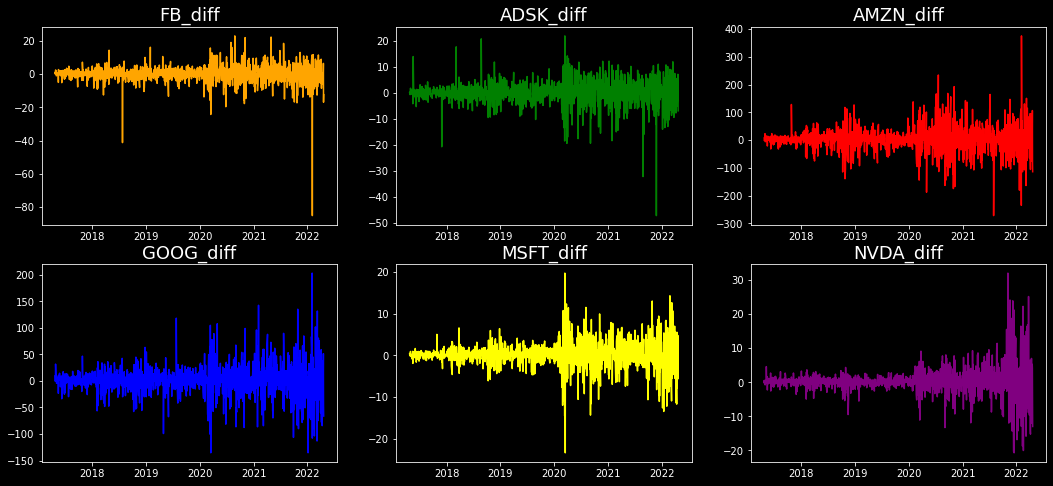

In [66]:
fig, ax = plt.subplots(nrows = 2, ncols= 3, figsize = (18,8))

ax[0, 0].plot(diff_data['FB_diff'], color = 'orange')
ax[0, 0].set_title('FB_diff', fontsize = 18)
ax[0, 1].plot(diff_data['ADSK_diff'], color = 'green')
ax[0, 1].set_title('ADSK_diff', fontsize = 18)
ax[0, 2].plot(diff_data['AMZN_diff'], color = 'red')
ax[0, 2].set_title('AMZN_diff', fontsize = 18)
ax[1, 0].plot(diff_data['GOOG_diff'], color = 'blue')
ax[1, 0].set_title('GOOG_diff', fontsize = 18)
ax[1, 1].plot(diff_data['MSFT_diff'], color = 'yellow')
ax[1, 1].set_title('MSFT_diff', fontsize = 18)
ax[1, 2].plot(diff_data['NVDA_diff'], color = 'purple')
ax[1, 2].set_title('NVDA_diff', fontsize = 18)

plt.show()

# Causality check

## FB and ADSK

In [15]:
# Assumption: AHE has causal effect on PCE
df1 = diff_data[['FB_diff', 'ADSK_diff']]
df1.head(5)

,FB_diff,ADSK_diff
Date,,
2017-04-25,1.020004,0.180001
2017-04-26,0.069993,-0.089997
2017-04-27,1.139999,0.399994
2017-04-28,2.550003,-0.559997
2017-05-01,2.210007,1.910003



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0059  , p=0.3161  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=1.0084  , p=0.3153  , df=1
likelihood ratio test: chi2=1.0079  , p=0.3154  , df=1
parameter F test:         F=1.0059  , p=0.3161  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6598  , p=0.5172  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=1.3248  , p=0.5156  , df=2
likelihood ratio test: chi2=1.3241  , p=0.5158  , df=2
parameter F test:         F=0.6598  , p=0.5172  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6486  , p=0.1764  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=4.9736  , p=0.1737  , df=3
likelihood ratio test: chi2=4.9638  , p=0.1745  , df=3
parameter F test:         F=1.6486  , p=0.1764  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5788  , p=0.

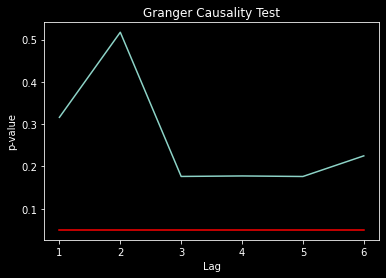

In [16]:
from statsmodels.tsa.stattools import grangercausalitytests, q_stat
granger_results = grangercausalitytests(df1, maxlag=6, verbose=True) 
alpha = 0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]
    res_list.append(res)
pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']
pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

# ADSK does not cause FB


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3273  , p=0.1274  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=2.3329  , p=0.1267  , df=1
likelihood ratio test: chi2=2.3307  , p=0.1268  , df=1
parameter F test:         F=2.3273  , p=0.1274  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5661  , p=0.2093  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=3.1447  , p=0.2076  , df=2
likelihood ratio test: chi2=3.1408  , p=0.2080  , df=2
parameter F test:         F=1.5661  , p=0.2093  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0784  , p=0.0267  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=9.2870  , p=0.0257  , df=3
likelihood ratio test: chi2=9.2528  , p=0.0261  , df=3
parameter F test:         F=3.0784  , p=0.0267  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.3083  , p=0.

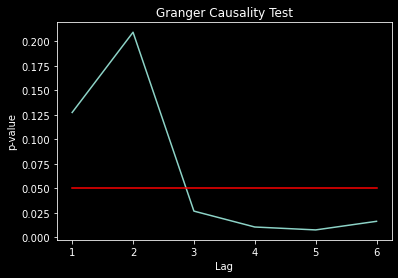

In [17]:
df2 = diff_data[['ADSK_diff', 'FB_diff']]

granger_results = grangercausalitytests(df2, maxlag=6, verbose=True) 
alpha = 0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]
    res_list.append(res)
pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']
pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

# FB causes ADSK starting from lag 3

## FB and AMZN


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2398  , p=0.6245  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=0.2403  , p=0.6240  , df=1
likelihood ratio test: chi2=0.2403  , p=0.6240  , df=1
parameter F test:         F=0.2398  , p=0.6245  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1462  , p=0.8640  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=0.2935  , p=0.8635  , df=2
likelihood ratio test: chi2=0.2935  , p=0.8635  , df=2
parameter F test:         F=0.1462  , p=0.8640  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1640  , p=0.9207  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=0.4946  , p=0.9201  , df=3
likelihood ratio test: chi2=0.4945  , p=0.9201  , df=3
parameter F test:         F=0.1640  , p=0.9207  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1743  , p=0.

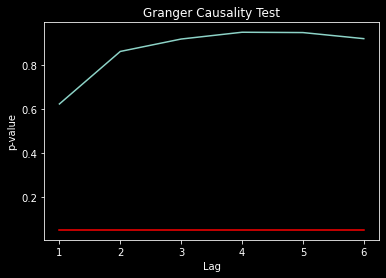

In [18]:
df3 = diff_data[['FB_diff', 'AMZN_diff']]

granger_results = grangercausalitytests(df3, maxlag=6, verbose=True) 
alpha = 0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]
    res_list.append(res)
pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']
pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

# AMZN does not cause FB


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.0858 , p=0.0000  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=18.1291 , p=0.0000  , df=1
likelihood ratio test: chi2=17.9996 , p=0.0000  , df=1
parameter F test:         F=18.0858 , p=0.0000  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.2233  , p=0.0001  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=18.5204 , p=0.0001  , df=2
likelihood ratio test: chi2=18.3852 , p=0.0001  , df=2
parameter F test:         F=9.2233  , p=0.0001  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.4804  , p=0.0002  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=19.5501 , p=0.0002  , df=3
likelihood ratio test: chi2=19.3994 , p=0.0002  , df=3
parameter F test:         F=6.4804  , p=0.0002  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.0469  , p=0.

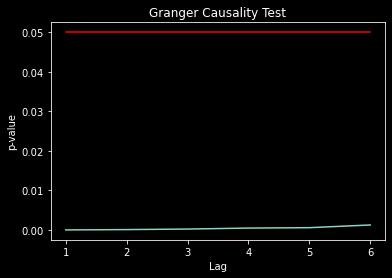

In [19]:
df4 = diff_data[['AMZN_diff', 'FB_diff']]

granger_results = grangercausalitytests(df4, maxlag=6, verbose=True) 
alpha = 0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]
    res_list.append(res)
pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']
pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

# FB cause AMZN

## FB and GOOG


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.6046 , p=0.0000  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=17.6467 , p=0.0000  , df=1
likelihood ratio test: chi2=17.5240 , p=0.0000  , df=1
parameter F test:         F=17.6046 , p=0.0000  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.0549  , p=0.0001  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=18.1823 , p=0.0001  , df=2
likelihood ratio test: chi2=18.0519 , p=0.0001  , df=2
parameter F test:         F=9.0549  , p=0.0001  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.2955  , p=0.0003  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=18.9923 , p=0.0003  , df=3
likelihood ratio test: chi2=18.8500 , p=0.0003  , df=3
parameter F test:         F=6.2955  , p=0.0003  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.8961  , p=0.

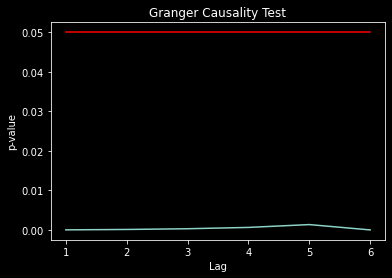

In [20]:
df5 = diff_data[['FB_diff', 'GOOG_diff']]

granger_results = grangercausalitytests(df5, maxlag=6, verbose=True) 
alpha = 0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]
    res_list.append(res)
pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']
pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

# GOOG causes FB


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0470  , p=0.8283  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=0.0471  , p=0.8281  , df=1
likelihood ratio test: chi2=0.0471  , p=0.8281  , df=1
parameter F test:         F=0.0470  , p=0.8283  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2257  , p=0.2939  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=2.4612  , p=0.2921  , df=2
likelihood ratio test: chi2=2.4588  , p=0.2925  , df=2
parameter F test:         F=1.2257  , p=0.2939  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8251  , p=0.4800  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=2.4892  , p=0.4772  , df=3
likelihood ratio test: chi2=2.4868  , p=0.4777  , df=3
parameter F test:         F=0.8251  , p=0.4800  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7493  , p=0.

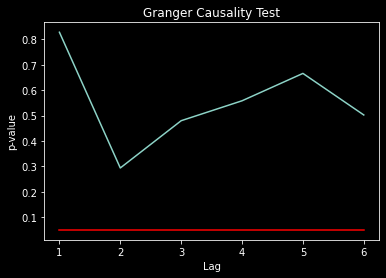

In [21]:
df6 = diff_data[['GOOG_diff', 'FB_diff']]

granger_results = grangercausalitytests(df6, maxlag=6, verbose=True) 
alpha = 0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]
    res_list.append(res)
pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']
pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

# FB does not cause GOOG

## FB and MSFT


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.4491 , p=0.0001  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=15.4861 , p=0.0001  , df=1
likelihood ratio test: chi2=15.3914 , p=0.0001  , df=1
parameter F test:         F=15.4491 , p=0.0001  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.8835  , p=0.0004  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=15.8300 , p=0.0004  , df=2
likelihood ratio test: chi2=15.7311 , p=0.0004  , df=2
parameter F test:         F=7.8835  , p=0.0004  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.8241  , p=0.0000  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=23.6038 , p=0.0000  , df=3
likelihood ratio test: chi2=23.3846 , p=0.0000  , df=3
parameter F test:         F=7.8241  , p=0.0000  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.8622  , p=0.

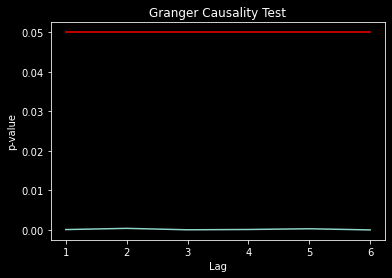

In [67]:
df7 = diff_data[['FB_diff', 'MSFT_diff']]

granger_results = grangercausalitytests(df7, maxlag=6, verbose=True) 
alpha = 0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]
    res_list.append(res)
pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']
pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

# MSFT causes FB


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1333  , p=0.2873  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=1.1360  , p=0.2865  , df=1
likelihood ratio test: chi2=1.1355  , p=0.2866  , df=1
parameter F test:         F=1.1333  , p=0.2873  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5764  , p=0.5620  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=1.1575  , p=0.5606  , df=2
likelihood ratio test: chi2=1.1570  , p=0.5607  , df=2
parameter F test:         F=0.5764  , p=0.5620  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0314  , p=0.0284  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=9.1453  , p=0.0274  , df=3
likelihood ratio test: chi2=9.1121  , p=0.0278  , df=3
parameter F test:         F=3.0314  , p=0.0284  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4470  , p=0.

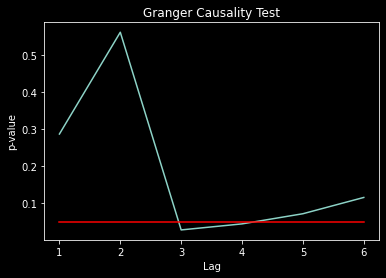

In [68]:
df8 = diff_data[['MSFT_diff', 'FB_diff']]

granger_results = grangercausalitytests(df8, maxlag=6, verbose=True) 
alpha = 0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]
    res_list.append(res)
pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']
pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

#FB causes MSFT at lag 3 and 4

## FB and NVDA


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0455  , p=0.8311  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=0.0456  , p=0.8308  , df=1
likelihood ratio test: chi2=0.0456  , p=0.8308  , df=1
parameter F test:         F=0.0455  , p=0.8311  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2054  , p=0.8143  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=0.4125  , p=0.8136  , df=2
likelihood ratio test: chi2=0.4124  , p=0.8137  , df=2
parameter F test:         F=0.2054  , p=0.8143  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3190  , p=0.8116  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=0.9625  , p=0.8103  , df=3
likelihood ratio test: chi2=0.9621  , p=0.8104  , df=3
parameter F test:         F=0.3190  , p=0.8116  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3199  , p=0.

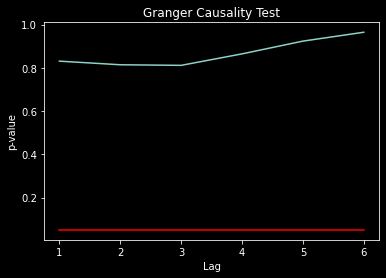

In [69]:
df9 = diff_data[['FB_diff', 'NVDA_diff']]

granger_results = grangercausalitytests(df9, maxlag=6, verbose=True) 
alpha = 0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]
    res_list.append(res)
pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']
pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

# NVDA does not cause FB


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0322  , p=0.1542  , df_denom=1254, df_num=1
ssr based chi2 test:   chi2=2.0371  , p=0.1535  , df=1
likelihood ratio test: chi2=2.0354  , p=0.1537  , df=1
parameter F test:         F=2.0322  , p=0.1542  , df_denom=1254, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2414  , p=0.2893  , df_denom=1251, df_num=2
ssr based chi2 test:   chi2=2.4928  , p=0.2875  , df=2
likelihood ratio test: chi2=2.4903  , p=0.2879  , df=2
parameter F test:         F=1.2414  , p=0.2893  , df_denom=1251, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2742  , p=0.0783  , df_denom=1248, df_num=3
ssr based chi2 test:   chi2=6.8609  , p=0.0765  , df=3
likelihood ratio test: chi2=6.8422  , p=0.0771  , df=3
parameter F test:         F=2.2742  , p=0.0783  , df_denom=1248, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7484  , p=0.

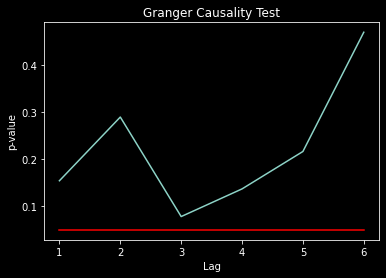

In [70]:
df10 = diff_data[['NVDA_diff', 'FB_diff']]

granger_results = grangercausalitytests(df10, maxlag=6, verbose=True) 
alpha = 0.05
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]
    res_list.append(res)
pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']
pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

# FB does not cause NVDA

# VARMA model

In [73]:
# Since NVDA does not have causal effect with FB, remove it
diff_data_new = diff_data.iloc[:, :-1]
diff_data_new.head()

,FB_diff,ADSK_diff,AMZN_diff,GOOG_diff,MSFT_diff
Date,,,,,
2017-04-25,1.020004,0.180001,0.210022,9.539978,0.389999
2017-04-26,0.069993,-0.089997,1.669983,-0.570008,-0.089996
2017-04-27,1.139999,0.399994,9.090027,2.520020,0.439995
2017-04-28,2.550003,-0.559997,6.609985,31.710022,0.190002
2017-05-01,2.210007,1.910003,23.239990,6.609985,0.950005


In [74]:
# Split into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(diff_data_new, test_size =0.2, shuffle=False)

print(train.shape, test.shape)

(1006, 5) (252, 5)


## Finding the best orders

/Users/kaichengzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


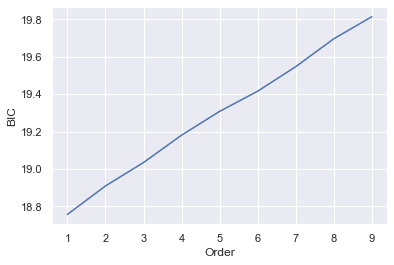

In [75]:
# Finding the best fit order of p
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR

var_model=VAR(train)
results_bic =[] 
for p in range(1,10):  
    results = var_model.fit(p)
    results_bic.append(results.bic) 
sbn.set()
plt.plot(list(np.arange(1,10,1)), results_bic) 
plt.xlabel("Order")
plt.ylabel("BIC") #BIC
plt.show()

# p = 1 is the best

/Users/kaichengzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kaichengzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kaichengzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kaichengzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum 

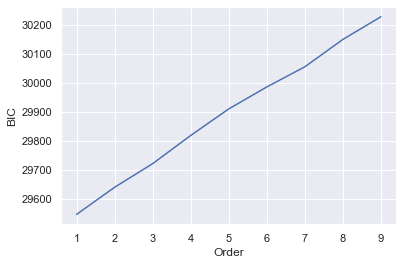

In [78]:
# Finding the best fit order of q

from statsmodels.tsa.statespace.varmax import VARMAX
results_bic =[]
for q in range(1,10):
    model = VARMAX(train, order= (0,q))
    results = model.fit(maxiter=50, disp=False)
    results_bic.append(results.bic)
plt.plot(list(np.arange(1,10,1)), results_bic)
plt.xlabel("Order")
plt.ylabel("BIC")
plt.show()

# q = 1 is the best

## Modeling 

### VAR

In [76]:
# the choosen model is p = 1

from statsmodels.tsa.vector_ar.var_model import VAR
var_model = VAR(train).fit(1)
var_model.summary()


/Users/kaichengzhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 28, May, 2022
Time:                     15:03:24
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    18.7577
Nobs:                     1005.00    HQIC:                   18.6668
Log likelihood:          -16452.2    FPE:                1.20972e+08
AIC:                      18.6111    Det(Omega_mle):     1.17425e+08
--------------------------------------------------------------------
Results for equation FB_diff
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.198493         0.138426            1.434           0.152
L1.FB_diff           0.034693         0.045064            0.770           0.441
L1.ADSK_diff        -0.011558         0.045111           -0.25

In [77]:
yhat = var_model.forecast(var_model.endog, steps=252) 
print(yhat)

[[ 0.88546202  0.8512114   7.37036872  6.27233784  0.78719445]
 [-0.01653521  0.03735192  1.39063353  0.47492634  0.01917381]
 [ 0.20205334  0.24315318  2.67560438  1.68187703  0.23912357]
 ...
 [ 0.14993894  0.19728384  2.39422276  1.39326957  0.18881301]
 [ 0.14993894  0.19728384  2.39422276  1.39326957  0.18881301]
 [ 0.14993894  0.19728384  2.39422276  1.39326957  0.18881301]]


In [78]:
#clean up the index
idx=test.index
df_preds = pd.DataFrame(yhat).set_index(idx)
df_preds

,0,1,2,3,4
Date,,,,,
2021-04-23,0.885462,0.851211,7.370369,6.272338,0.787194
2021-04-26,-0.016535,0.037352,1.390634,0.474926,0.019174
2021-04-27,0.202053,0.243153,2.675604,1.681877,0.239124
2021-04-28,0.134475,0.183678,2.309575,1.307059,0.174031
2021-04-29,0.154461,0.201278,2.419091,1.418461,0.193146
...,...,...,...,...,...
2022-04-14,0.149939,0.197284,2.394223,1.393270,0.188813
2022-04-18,0.149939,0.197284,2.394223,1.393270,0.188813
2022-04-19,0.149939,0.197284,2.394223,1.393270,0.188813


In [81]:
# Exclude NVDA for not having causal effect
data_new = data.iloc[:,:-1]
data_new.columns

Index(['FB', 'ADSK', 'AMZN', 'GOOG', 'MSFT'], dtype='object')

In [82]:
df_preds.columns = data_new.columns #making the column names the same to proceed
forecast_results = pd.concat([data_new[-253:-252], df_preds], axis=0).reset_index(drop=True)\
                    .cumsum()\
                    .drop([0])\
                    .set_index(idx)
forecast_results.columns=['FB_forecast','ADSK_forecast', 'AMZN_forecast', 'GOOG_forecast', 'MSFT_forecast']

In [83]:
final_results = pd.concat([data_new[-252:],forecast_results], axis=1)
final_results.head(5)


,FB,ADSK,AMZN,GOOG,MSFT,FB_forecast,ADSK_forecast,AMZN_forecast,GOOG_forecast,MSFT_forecast
Date,,,,,,,,,,
2021-04-23,301.130005,295.269989,3340.879883,2315.300049,261.149994,297.405451,288.851211,3316.410408,2274.192260,257.957207
2021-04-26,303.040009,299.339996,3409.000000,2326.739990,261.549988,297.388916,288.888563,3317.801041,2274.667186,257.976381
2021-04-27,303.570007,297.869995,3417.429932,2307.120117,261.970001,297.590969,289.131717,3320.476646,2276.349063,258.215505
2021-04-28,307.100006,299.230011,3458.500000,2379.909912,254.559998,297.725444,289.315394,3322.786221,2277.656122,258.389535
2021-04-29,329.510010,296.279999,3471.310059,2429.889893,252.509995,297.879905,289.516672,3325.205312,2279.074583,258.582681


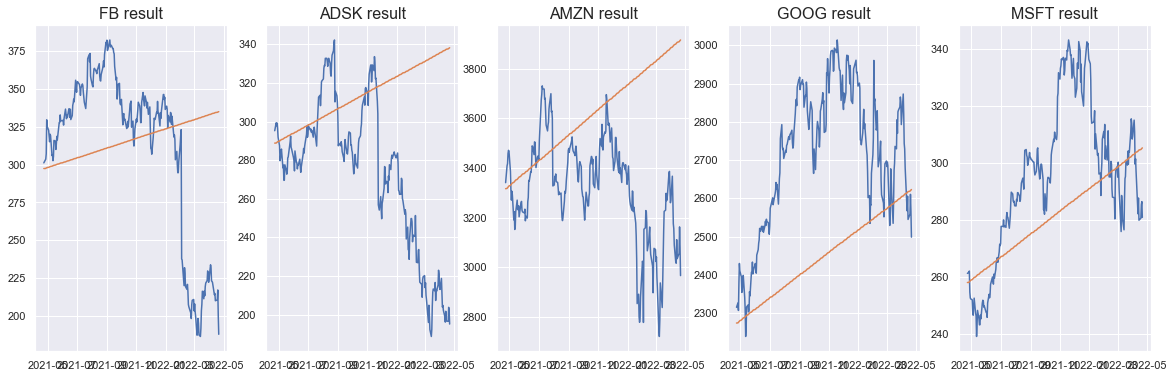

In [85]:
# Visualizing forecast and real comparisons
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5, figsize = (20,6))
ax1.plot(final_results[['FB', 'FB_forecast']])
ax1.set_title('FB result', fontsize = 16)
ax2.plot(final_results[['ADSK', 'ADSK_forecast']])
ax2.set_title('ADSK result', fontsize = 16)
ax3.plot(final_results[['AMZN', 'AMZN_forecast']])
ax3.set_title('AMZN result', fontsize = 16)
ax4.plot(final_results[['GOOG', 'GOOG_forecast']])
ax4.set_title('GOOG result', fontsize = 16)
ax5.plot(final_results[['MSFT', 'MSFT_forecast']])
ax5.set_title('MSFT result', fontsize = 16)

plt.show()



In [86]:
### FB
# SMAPE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
smape_fb = mean_absolute_percentage_error(final_results['FB'],final_results['FB_forecast'])
print ('sMAPE of FB:', smape_fb) 

# MSE
from sklearn.metrics import mean_squared_error as MSE
mse_fb = MSE(final_results['FB'],final_results['FB_forecast'])
print('MSE of FB: ', mse_fb)
print('\n')

### ADSK
# SMAPE
smape_adsk = mean_absolute_percentage_error(final_results['ADSK'],final_results['ADSK_forecast'])
print ('sMAPE of ADSK:', smape_adsk) 

# MSE
mse_adsk = MSE(final_results['ADSK'],final_results['ADSK_forecast'])
print('MSE of ADSK: ', mse_adsk)
print('\n')



### AMZN
# SMAPE
smape_amzn = mean_absolute_percentage_error(final_results['AMZN'],final_results['AMZN_forecast'])
print ('sMAPE of AMZN:', smape_amzn) 

# MSE
mse_amzn = MSE(final_results['AMZN'],final_results['AMZN_forecast'])
print('MSE of AMZN: ', mse_amzn)
print('\n')



### GOOG
# SMAPE
smape_goog = mean_absolute_percentage_error(final_results['GOOG'],final_results['GOOG_forecast'])
print ('sMAPE of GOOG:', smape_goog) 

#MSE
mse_goog = MSE(final_results['GOOG'],final_results['GOOG_forecast'])
print('MSE of GOOG: ', mse_goog)
print('\n')

### MSFT
# SMAPE
smape_msft = mean_absolute_percentage_error(final_results['MSFT'],final_results['MSFT_forecast'])
print ('sMAPE of MSFT:', smape_msft) 

#MSE
mse_msft = MSE(final_results['MSFT'],final_results['MSFT_forecast'])
print('MSE of MSFT: ', mse_msft)
print('\n')


sMAPE of FB: 0.16130740690790263
MSE of FB:  3946.654637103037


sMAPE of ADSK: 0.1626026864067222
MSE of ADSK:  4039.364653227937


sMAPE of AMZN: 0.0987900875961422
MSE of AMZN:  197832.08889292754


sMAPE of GOOG: 0.10271243860383014
MSE of GOOG:  95993.05311953681


sMAPE of MSFT: 0.06724079682852471
MSE of MSFT:  625.8146893192295




## Visual of VAR performance on FB



In [87]:
train_data, test_data = train_test_split(data_new, test_size =0.2, shuffle=False)



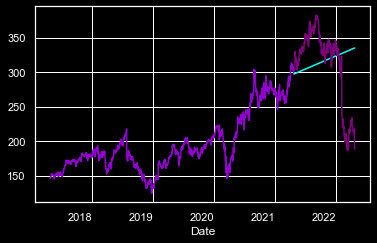

In [92]:
plt.grid(visible=False)
train_data['FB'].plot(color = 'darkviolet')
final_results['FB_forecast'].plot(color = 'cyan')
test_data['FB'].plot(color='purple')
plt.xticks(rotation = 0)
plt.show()